In [1]:
import numpy as np
import glob
import math
import sys 
import os
from math import pi
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.linalg import eigh
import sympy as sp
%matplotlib inline
from matplotlib.ticker import ScalarFormatter
import h5py


In [13]:
pip install jax jaxlib

/Users/bimladanu/.pyenv/versions/3.11.3/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import jax
import jax.numpy as np
from jax import jit, grad, vmap
from jax.scipy.optimize import minimize
from functools import partial

In [5]:

from py_alf import ALF_source, Simulation # Interface with ALF
#alf_src = ALF_source(branch='master') 
alf_src = ALF_source(branch='VAFQMC') 

Checking out branch VAFQMC
M	Prog/Hamiltonians.list
M	Prog/Hamiltonians/Hamiltonian_Anderson_smod.F90
M	Prog/Hamiltonians/Hamiltonian_Hubbard_optimization_smod.F90
Your branch is up to date with 'origin/VAFQMC'.


Already on 'VAFQMC'


Compiling ALF... 
Cleaning up Prog/
Cleaning up Libraries/
Cleaning up Analysis/
Compiling Libraries


entanglement_mod.F90:35:2:

   35 | #warning "You are compiling entanglement without MPI. No results possible"
      |  1~~~~~~
ar: creating archive modules_90.a
ar: creating archive libqrref.a


Compiling Analysis
Compiling Program
Parsing Hamiltonian parameters
filename: Hamiltonians/Hamiltonian_Kondo_smod.F90
filename: Hamiltonians/Hamiltonian_Hubbard_smod.F90
filename: Hamiltonians/Hamiltonian_Hubbard_Plain_Vanilla_smod.F90
filename: Hamiltonians/Hamiltonian_tV_smod.F90
filename: Hamiltonians/Hamiltonian_LRC_smod.F90
filename: Hamiltonians/Hamiltonian_Z2_Matter_smod.F90
filename: Hamiltonians/Hamiltonian_Spin_Peierls_smod.F90
filename: Hamiltonians/Hamiltonian_Hubbard_optimization_smod.F90
filename: Hamiltonians/Hamiltonian_Anderson_smod.F90
Compiling program modules
Link program
Done.
Prepare directory "/Users/bimladanu/Documents/ALF_AFQMC_SOURCE_CODE/VAFQMC-PROJECT/ALF/Files_VAFQMC/Python_pyalf_Test/ALF_data/Hubbard_Plain_Vanilla_Square_L1=4_L2=4_Symm=True_T=1.0_U=2.0_chem=0.0_beta=2.0_dtau=0.1_Projector=True_Theta=10.0_Adiabatic=True" for Monte Carlo run.
Create new directory.
Run /Users/bimladanu/Documents/ALF_AFQMC_SOURCE_CODE/VAFQMC-PROJECT/ALF/Prog/ALF.out
 ALF Copyr

entanglement_mod.F90:35:2:

   35 | #warning "You are compiling entanglement without MPI. No results possible"
      |  1~~~~~~
ar: creating archive modules_90.a
ar: creating archive libqrref.a


Compiling Analysis
Compiling Program
Parsing Hamiltonian parameters
filename: Hamiltonians/Hamiltonian_Kondo_smod.F90
filename: Hamiltonians/Hamiltonian_Hubbard_smod.F90
filename: Hamiltonians/Hamiltonian_Hubbard_Plain_Vanilla_smod.F90
filename: Hamiltonians/Hamiltonian_tV_smod.F90
filename: Hamiltonians/Hamiltonian_LRC_smod.F90
filename: Hamiltonians/Hamiltonian_Z2_Matter_smod.F90
filename: Hamiltonians/Hamiltonian_Spin_Peierls_smod.F90
filename: Hamiltonians/Hamiltonian_Hubbard_optimization_smod.F90
filename: Hamiltonians/Hamiltonian_Anderson_smod.F90
Compiling program modules
Link program
Done.
Prepare directory "/Users/bimladanu/Documents/ALF_AFQMC_SOURCE_CODE/VAFQMC-PROJECT/ALF/Files_VAFQMC/Python_pyalf_Test/ALF_data/Hubbard_Plain_Vanilla_Square_L1=4_L2=4_Symm=True_T=1.0_U=2.0_chem=0.0_beta=2.0_dtau=0.1_Projector=True_Theta=10.0_Adiabatic=True" for Monte Carlo run.
Resuming previous run.
Run /Users/bimladanu/Documents/ALF_AFQMC_SOURCE_CODE/VAFQMC-PROJECT/ALF/Prog/ALF.out
 ALF Copy

entanglement_mod.F90:35:2:

   35 | #warning "You are compiling entanglement without MPI. No results possible"
      |  1~~~~~~
ar: creating archive modules_90.a
ar: creating archive libqrref.a


Compiling Analysis
Compiling Program
Parsing Hamiltonian parameters
filename: Hamiltonians/Hamiltonian_Kondo_smod.F90
filename: Hamiltonians/Hamiltonian_Hubbard_smod.F90
filename: Hamiltonians/Hamiltonian_Hubbard_Plain_Vanilla_smod.F90
filename: Hamiltonians/Hamiltonian_tV_smod.F90
filename: Hamiltonians/Hamiltonian_LRC_smod.F90
filename: Hamiltonians/Hamiltonian_Z2_Matter_smod.F90
filename: Hamiltonians/Hamiltonian_Spin_Peierls_smod.F90
filename: Hamiltonians/Hamiltonian_Hubbard_optimization_smod.F90
filename: Hamiltonians/Hamiltonian_Anderson_smod.F90
Compiling program modules
Link program
Done.
Prepare directory "/Users/bimladanu/Documents/ALF_AFQMC_SOURCE_CODE/VAFQMC-PROJECT/ALF/Files_VAFQMC/Python_pyalf_Test/ALF_data/Hubbard_Plain_Vanilla_Square_L1=4_L2=4_Symm=True_T=1.0_U=2.0_chem=0.0_beta=2.0_dtau=0.1_Projector=True_Theta=10.0_Adiabatic=True" for Monte Carlo run.
Resuming previous run.
Run /Users/bimladanu/Documents/ALF_AFQMC_SOURCE_CODE/VAFQMC-PROJECT/ALF/Prog/ALF.out
 ALF Copy

entanglement_mod.F90:35:2:

   35 | #warning "You are compiling entanglement without MPI. No results possible"
      |  1~~~~~~
ar: creating archive modules_90.a
ar: creating archive libqrref.a


Compiling Analysis
Compiling Program
Parsing Hamiltonian parameters
filename: Hamiltonians/Hamiltonian_Kondo_smod.F90
filename: Hamiltonians/Hamiltonian_Hubbard_smod.F90
filename: Hamiltonians/Hamiltonian_Hubbard_Plain_Vanilla_smod.F90
filename: Hamiltonians/Hamiltonian_tV_smod.F90
filename: Hamiltonians/Hamiltonian_LRC_smod.F90
filename: Hamiltonians/Hamiltonian_Z2_Matter_smod.F90
filename: Hamiltonians/Hamiltonian_Spin_Peierls_smod.F90
filename: Hamiltonians/Hamiltonian_Hubbard_optimization_smod.F90
filename: Hamiltonians/Hamiltonian_Anderson_smod.F90
Compiling program modules
Link program
Done.
Prepare directory "/Users/bimladanu/Documents/ALF_AFQMC_SOURCE_CODE/VAFQMC-PROJECT/ALF/Files_VAFQMC/Python_pyalf_Test/ALF_data/Hubbard_Plain_Vanilla_Square_L1=4_L2=4_Symm=True_T=1.0_U=2.0_chem=0.0_beta=2.0_dtau=0.1_Projector=True_Theta=10.0_Adiabatic=True" for Monte Carlo run.
Resuming previous run.
Run /Users/bimladanu/Documents/ALF_AFQMC_SOURCE_CODE/VAFQMC-PROJECT/ALF/Prog/ALF.out
 ALF Copy

entanglement_mod.F90:35:2:

   35 | #warning "You are compiling entanglement without MPI. No results possible"
      |  1~~~~~~
ar: creating archive modules_90.a
ar: creating archive libqrref.a


Compiling Analysis
Compiling Program
Parsing Hamiltonian parameters
filename: Hamiltonians/Hamiltonian_Kondo_smod.F90
filename: Hamiltonians/Hamiltonian_Hubbard_smod.F90
filename: Hamiltonians/Hamiltonian_Hubbard_Plain_Vanilla_smod.F90
filename: Hamiltonians/Hamiltonian_tV_smod.F90
filename: Hamiltonians/Hamiltonian_LRC_smod.F90
filename: Hamiltonians/Hamiltonian_Z2_Matter_smod.F90
filename: Hamiltonians/Hamiltonian_Spin_Peierls_smod.F90
filename: Hamiltonians/Hamiltonian_Hubbard_optimization_smod.F90
filename: Hamiltonians/Hamiltonian_Anderson_smod.F90
Compiling program modules
Link program
Done.
Prepare directory "/Users/bimladanu/Documents/ALF_AFQMC_SOURCE_CODE/VAFQMC-PROJECT/ALF/Files_VAFQMC/Python_pyalf_Test/ALF_data/Hubbard_Plain_Vanilla_Square_L1=4_L2=4_Symm=True_T=1.0_U=2.0_chem=0.0_beta=2.0_dtau=0.1_Projector=True_Theta=10.0_Adiabatic=True" for Monte Carlo run.
Resuming previous run.
Run /Users/bimladanu/Documents/ALF_AFQMC_SOURCE_CODE/VAFQMC-PROJECT/ALF/Prog/ALF.out
 ALF Copy

<Figure size 1000x500 with 0 Axes>

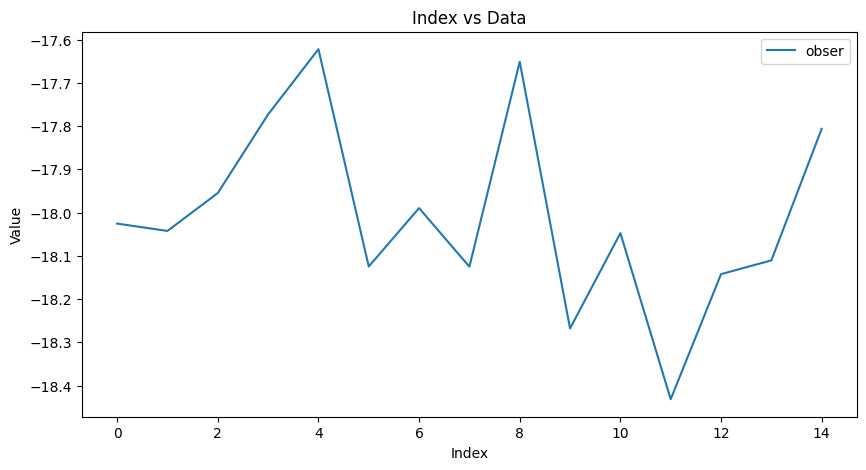

In [6]:


def setup_simulations(alf_src, bin_values):
    for NBin in bin_values:
        sim_params = {
            'Model': 'Hubbard_Plain_Vanilla',
            'Lattice_type': 'Square',
            'L1': 4,
            'L2': 4,
            'Symm': True,
            'ham_T': 1.0,
            'ham_U': 2.0,
            'ham_chem': 0.0,
            'beta': 2.0,
            'Ltau': 0,
            'NSweep': 10,
            'NBin': NBin,  # Use the current bin value
            'dtau': 0.1,
            'Projector': True,
            'Theta': 10.0,
            'Adiabatic': True,
        }

        sim = Simulation(alf_src, 'Hubbard_Plain_Vanilla', sim_params)
        sim.compile()
        sim.run()

# Define bin values
bin_values = [1, 2, 3, 4, 5]

# Create an instance of ALF_source (assuming it's a class)
alf_src_instance = ALF_source()

# Set up simulations
setup_simulations(alf_src_instance, bin_values)



# Define the file path
file_path = "ALF_data/Hubbard_Plain_Vanilla_Square_*/data.h5"

# Initialize lists to store data
obser_data_list = []
sign_data_list = []

# Use os.path to find matching files
matching_files = glob.glob(file_path)

# Ensure that at least one file matches the pattern
if matching_files:
    # Loop over each matching file
    for file in matching_files:
        # Open the HDF5 file
        with h5py.File(file, 'r') as f:
            # Access the Ener_scal group
            Ener_scal_group = f['Ener_scal']
            
            # Get the data from the 'obser' and 'sign' datasets
            obser_data = Ener_scal_group['obser'][:]
            sign_data = Ener_scal_group['sign'][:]
            
            # Store the data in lists
            obser_data_list.append(obser_data)
            sign_data_list.append(sign_data)
else:
    print("No matching HDF5 files found.")


# Print values in obser_data_list
print("Values in obser_data_list:")
for obser_data in obser_data_list:
    print(obser_data)

# Print values in sign_data_list
print("\nValues in sign_data_list:")
for sign_data in sign_data_list:
    print(sign_data)

# Plotting
plt.figure(figsize=(10, 5))

# Plot 'obser' data

# Flatten obser_data_list to ensure compatibility with index
flat_obser_data = np.concatenate(obser_data_list)

# Flatten sign_data_list to ensure compatibility with index
flat_sign_data = np.concatenate(sign_data_list)

# Plot index versus 'obser' data
plt.figure(figsize=(10, 5))
plt.plot(range(len(flat_obser_data)), flat_obser_data[:, 0, 0], label='obser')

# Plot index versus 'sign' data
#plt.plot(range(len(flat_sign_data)), flat_sign_data, label='sign', color='orange')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Index vs Data')
plt.legend()
plt.show()


Epoch 1/50, NBin=1, Loss: 162.80897521972656, Optimized dtau: [[[0.14919999 0.0507    ]]

 [[0.1493     0.0507    ]]

 [[0.1486     0.0507    ]]

 [[0.1471     0.0507    ]]

 [[0.1459     0.0507    ]]

 [[0.14999999 0.0507    ]]

 [[0.1489     0.0507    ]]

 [[0.14999999 0.0507    ]]

 [[0.1461     0.0507    ]]

 [[0.1512     0.0507    ]]

 [[0.1494     0.0507    ]]

 [[0.1525     0.0507    ]]

 [[0.1501     0.0507    ]]

 [[0.14989999 0.0507    ]]

 [[0.14739999 0.0507    ]]

 [[0.1503     0.0507    ]]

 [[0.15339999 0.0507    ]]

 [[0.1477     0.0507    ]]

 [[0.14999999 0.0507    ]]

 [[0.14919999 0.0507    ]]

 [[0.148      0.0507    ]]

 [[0.1495     0.0507    ]]

 [[0.1498     0.0507    ]]

 [[0.1478     0.0507    ]]

 [[0.1493     0.0507    ]]

 [[0.1484     0.0507    ]]

 [[0.1469     0.0507    ]]

 [[0.1472     0.0507    ]]

 [[0.14729999 0.0507    ]]

 [[0.1501     0.0507    ]]

 [[0.1466     0.0507    ]]

 [[0.1475     0.0507    ]]

 [[0.1484     0.0507    ]]

 [[0.1505     

Already on 'VAFQMC'


Compiling ALF... 
Cleaning up Prog/
Cleaning up Libraries/
Cleaning up Analysis/
Compiling Libraries


entanglement_mod.F90:35:2:

   35 | #warning "You are compiling entanglement without MPI. No results possible"
      |  1~~~~~~
ar: creating archive modules_90.a
ar: creating archive libqrref.a


Compiling Analysis
Compiling Program
Parsing Hamiltonian parameters
filename: Hamiltonians/Hamiltonian_Kondo_smod.F90
filename: Hamiltonians/Hamiltonian_Hubbard_smod.F90
filename: Hamiltonians/Hamiltonian_Hubbard_Plain_Vanilla_smod.F90
filename: Hamiltonians/Hamiltonian_tV_smod.F90
filename: Hamiltonians/Hamiltonian_LRC_smod.F90
filename: Hamiltonians/Hamiltonian_Z2_Matter_smod.F90
filename: Hamiltonians/Hamiltonian_Spin_Peierls_smod.F90
Compiling program modules
Link program
Done.
Prepare directory "/Users/bimladanu/Documents/ALF_AFQMC_SOURCE_CODE/VAFQMC-PROJECT/Pyalf-test-run/Pyalf-Test-VAFQMC/ALF_data/Hubbard_Plain_Vanilla_Square_L1=4_L2=4_Symm=True_T=1.0_U=2.0_chem=0.0_beta=2.0_dtau=[[[ 2.56      -2.365    ]]

 [[ 2.5649998 -2.365    ]]

 [[ 2.53      -2.365    ]]

 [[ 2.455     -2.365    ]]

 [[ 2.395     -2.365    ]]

 [[ 2.6       -2.365    ]]

 [[ 2.5449998 -2.365    ]]

 [[ 2.6       -2.365    ]]

 [[ 2.405     -2.365    ]]

 [[ 2.6599998 -2.365    ]]

 [[ 2.57      -2.365    

OSError: [Errno 63] File name too long: '/Users/bimladanu/Documents/ALF_AFQMC_SOURCE_CODE/VAFQMC-PROJECT/Pyalf-test-run/Pyalf-Test-VAFQMC/ALF_data/Hubbard_Plain_Vanilla_Square_L1=4_L2=4_Symm=True_T=1.0_U=2.0_chem=0.0_beta=2.0_dtau=[[[ 2.56      -2.365    ]]\n\n [[ 2.5649998 -2.365    ]]\n\n [[ 2.53      -2.365    ]]\n\n [[ 2.455     -2.365    ]]\n\n [[ 2.395     -2.365    ]]\n\n [[ 2.6       -2.365    ]]\n\n [[ 2.5449998 -2.365    ]]\n\n [[ 2.6       -2.365    ]]\n\n [[ 2.405     -2.365    ]]\n\n [[ 2.6599998 -2.365    ]]\n\n [[ 2.57      -2.365    ]]\n\n [[ 2.725     -2.365    ]]\n\n [[ 2.605     -2.365    ]]\n\n [[ 2.595     -2.365    ]]\n\n [[ 2.47      -2.365    ]]\n\n [[ 2.615     -2.365    ]]\n\n [[ 2.77      -2.365    ]]\n\n [[ 2.485     -2.365    ]]\n\n [[ 2.6       -2.365    ]]\n\n [[ 2.56      -2.365    ]]\n\n [[ 2.5       -2.365    ]]\n\n [[ 2.575     -2.365    ]]\n\n [[ 2.59      -2.365    ]]\n\n [[ 2.49      -2.365    ]]\n\n [[ 2.5649998 -2.365    ]]\n\n [[ 2.52      -2.365    ]]\n\n [[ 2.445     -2.365    ]]\n\n [[ 2.46      -2.365    ]]\n\n [[ 2.465     -2.365    ]]\n\n [[ 2.605     -2.365    ]]\n\n [[ 2.4299998 -2.365    ]]\n\n [[ 2.475     -2.365    ]]\n\n [[ 2.52      -2.365    ]]\n\n [[ 2.625     -2.365    ]]\n\n [[ 2.48      -2.365    ]]\n\n [[ 2.54      -2.365    ]]\n\n [[ 2.625     -2.365    ]]\n\n [[ 2.6       -2.365    ]]\n\n [[ 2.54      -2.365    ]]\n\n [[ 2.59      -2.365    ]]\n\n [[ 2.585     -2.365    ]]\n\n [[ 2.455     -2.365    ]]\n\n [[ 2.595     -2.365    ]]\n\n [[ 2.415     -2.365    ]]\n\n [[ 2.74      -2.365    ]]\n\n [[ 2.635     -2.365    ]]\n\n [[ 2.4099998 -2.365    ]]\n\n [[ 2.615     -2.365    ]]\n\n [[ 2.5149999 -2.365    ]]\n\n [[ 2.6899998 -2.365    ]]\n\n [[ 2.585     -2.365    ]]\n\n [[ 2.495     -2.365    ]]\n\n [[ 2.575     -2.365    ]]\n\n [[ 2.52      -2.365    ]]\n\n [[ 2.665     -2.365    ]]\n\n [[ 2.5549998 -2.365    ]]\n\n [[ 2.5       -2.365    ]]\n\n [[ 2.5649998 -2.365    ]]\n\n [[ 2.77      -2.365    ]]\n\n [[ 2.675     -2.365    ]]\n\n [[ 2.5       -2.365    ]]\n\n [[ 2.635     -2.365    ]]\n\n [[ 2.605     -2.365    ]]\n\n [[ 2.56      -2.365    ]]\n\n [[ 2.635     -2.365    ]]\n\n [[ 2.7849998 -2.365    ]]\n\n [[ 2.55      -2.365    ]]\n\n [[ 2.695     -2.365    ]]\n\n [[ 2.5349998 -2.365    ]]\n\n [[ 2.605     -2.365    ]]\n\n [[ 2.5449998 -2.365    ]]\n\n [[ 2.56      -2.365    ]]\n\n [[ 2.48      -2.365    ]]\n\n [[ 2.47      -2.365    ]]\n\n [[ 2.485     -2.365    ]]\n\n [[ 2.55      -2.365    ]]\n\n [[ 2.77      -2.365    ]]\n\n [[ 2.695     -2.365    ]]\n\n [[ 2.53      -2.365    ]]\n\n [[ 2.465     -2.365    ]]\n\n [[ 2.6699998 -2.365    ]]\n\n [[ 2.595     -2.365    ]]\n\n [[ 2.54      -2.365    ]]\n\n [[ 2.6       -2.365    ]]\n\n [[ 2.485     -2.365    ]]\n\n [[ 2.4199998 -2.365    ]]\n\n [[ 2.72      -2.365    ]]\n\n [[ 2.5       -2.365    ]]\n\n [[ 2.5249999 -2.365    ]]\n\n [[ 2.445     -2.365    ]]\n\n [[ 2.625     -2.365    ]]\n\n [[ 2.5       -2.365    ]]\n\n [[ 2.53      -2.365    ]]\n\n [[ 2.605     -2.365    ]]\n\n [[ 2.72      -2.365    ]]\n\n [[ 2.34      -2.365    ]]\n\n [[ 2.48      -2.365    ]]\n\n [[ 2.48      -2.365    ]]\n\n [[ 2.335     -2.365    ]]\n\n [[ 2.56      -2.365    ]]\n\n [[ 2.5       -2.365    ]]\n\n [[ 2.575     -2.365    ]]\n\n [[ 2.46      -2.365    ]]\n\n [[ 2.49      -2.365    ]]\n\n [[ 2.55      -2.365    ]]\n\n [[ 2.645     -2.365    ]]\n\n [[ 2.54      -2.365    ]]\n\n [[ 2.51      -2.365    ]]\n\n [[ 2.61      -2.365    ]]\n\n [[ 2.56      -2.365    ]]\n\n [[ 2.48      -2.365    ]]\n\n [[ 2.465     -2.365    ]]\n\n [[ 2.635     -2.365    ]]\n\n [[ 2.5449998 -2.365    ]]\n\n [[ 2.8149998 -2.365    ]]\n\n [[ 2.53      -2.365    ]]\n\n [[ 2.57      -2.365    ]]\n\n [[ 2.465     -2.365    ]]\n\n [[ 2.56      -2.365    ]]\n\n [[ 2.56      -2.365    ]]\n\n [[ 2.5649998 -2.365    ]]\n\n [[ 2.675     -2.365    ]]\n\n [[ 2.58      -2.365    ]]\n\n [[ 2.635     -2.365    ]]\n\n [[ 2.725     -2.365    ]]\n\n [[ 2.625     -2.365    ]]\n\n [[ 2.475     -2.365    ]]\n\n [[ 2.53      -2.365    ]]\n\n [[ 2.58      -2.365    ]]\n\n [[ 2.81      -2.365    ]]\n\n [[ 2.6699998 -2.365    ]]\n\n [[ 2.395     -2.365    ]]\n\n [[ 2.5549998 -2.365    ]]\n\n [[ 2.575     -2.365    ]]\n\n [[ 2.425     -2.365    ]]\n\n [[ 2.855     -2.365    ]]\n\n [[ 2.735     -2.365    ]]\n\n [[ 2.55      -2.365    ]]\n\n [[ 2.645     -2.365    ]]\n\n [[ 2.5249999 -2.365    ]]\n\n [[ 2.46      -2.365    ]]\n\n [[ 2.5049999 -2.365    ]]\n\n [[ 2.655     -2.365    ]]\n\n [[ 3.29      -2.365    ]]\n\n [[ 2.465     -2.365    ]]\n\n [[ 2.705     -2.365    ]]\n\n [[ 2.78      -2.365    ]]\n\n [[ 2.77      -2.365    ]]\n\n [[ 2.595     -2.365    ]]\n\n [[ 2.51      -2.365    ]]\n\n [[ 2.465     -2.365    ]]\n\n [[ 2.5649998 -2.365    ]]\n\n [[ 2.5649998 -2.365    ]]\n\n [[ 2.595     -2.365    ]]\n\n [[ 2.3999999 -2.365    ]]\n\n [[ 2.415     -2.365    ]]\n\n [[ 2.71      -2.365    ]]\n\n [[ 2.465     -2.365    ]]\n\n [[ 2.5549998 -2.365    ]]\n\n [[ 2.445     -2.365    ]]\n\n [[ 2.5049999 -2.365    ]]\n\n [[ 2.34      -2.365    ]]\n\n [[ 2.55      -2.365    ]]\n\n [[ 2.56      -2.365    ]]\n\n [[ 2.5       -2.365    ]]\n\n [[ 2.53      -2.365    ]]\n\n [[ 2.5549998 -2.365    ]]\n\n [[ 2.61      -2.365    ]]\n\n [[ 2.625     -2.365    ]]\n\n [[ 2.5549998 -2.365    ]]\n\n [[ 2.75      -2.365    ]]\n\n [[ 2.49      -2.365    ]]\n\n [[ 2.585     -2.365    ]]\n\n [[ 2.5149999 -2.365    ]]\n\n [[ 2.465     -2.365    ]]\n\n [[ 2.55      -2.365    ]]\n\n [[ 2.385     -2.365    ]]\n\n [[ 2.44      -2.365    ]]\n\n [[ 2.495     -2.365    ]]\n\n [[ 2.61      -2.365    ]]\n\n [[ 2.595     -2.365    ]]\n\n [[ 2.645     -2.365    ]]\n\n [[ 2.46      -2.365    ]]]_Projector=True_Theta=10.0_Adiabatic=True'

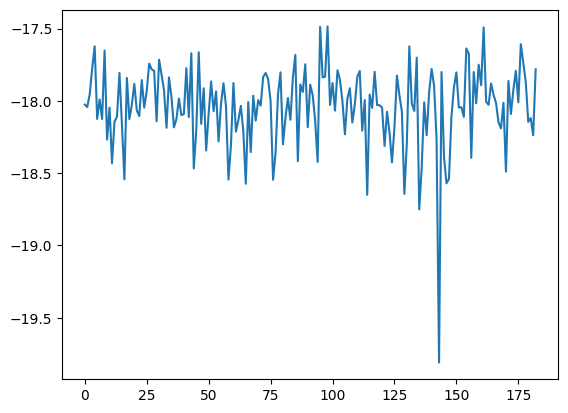

In [33]:
import os
import glob
import h5py
import jax.numpy as jnp
from jax import grad
import matplotlib.pyplot as plt

# Define the file path
file_path = "ALF_data/Hubbard_Plain_Vanilla_Square_*/data.h5"

# Function to compute loss (mean squared error)
def loss_fn(obser_data, dtau):
    predicted_obser_data = simulate_with_dtau(obser_data, dtau)
    return jnp.mean((obser_data - predicted_obser_data) ** 2)

# Function to perform simulations using the provided dtau
def simulate_with_dtau(obser_data, dtau):
    # Placeholder function, replace with actual simulation code
    simulated_data = obser_data[:, :, 0]  # Extracting the first column for each element in the array
    return simulated_data

# Function to perform gradient descent optimization
def gradient_descent(alf_src, bin_values, learning_rate, num_epochs):
    # Initialize lists to store losses and optimized dtau values
    losses = []
    optimized_dtau_list = []

    # Initialize lists to store data
    obser_data_list = []

    # Use glob to find matching files
    matching_files = glob.glob(file_path)

    # Ensure that at least one file matches the pattern
    if matching_files:
        # Loop over each matching file
        for file in matching_files:
            # Open the HDF5 file
            with h5py.File(file, 'r') as f:
                # Access the Ener_scal group
                Ener_scal_group = f['Ener_scal']
                
                # Get the data from the 'obser' dataset
                obser_data = Ener_scal_group['obser'][:]
                
                # Store the data in the list
                obser_data_list.append(obser_data)
    else:
        print("No matching HDF5 files found.")
        return [], []

    # Iterate over each NBin value
    for NBin, obser_data in zip(bin_values, obser_data_list):
        # Initial guess for dtau
        dtau = 0.1
        
        # Perform gradient descent
        for epoch in range(num_epochs):
            # Compute gradient of the loss function
            gradient = grad(loss_fn)(obser_data, dtau)

            # Update dtau using gradient descent
            dtau -= learning_rate * gradient

            # Limit dtau to four decimal places
            dtau = round(dtau, 4)

            # Compute loss
            loss = loss_fn(obser_data, dtau)

            # Store loss and optimized dtau
            losses.append(loss)
            optimized_dtau_list.append(dtau)

            # Print progress
            print(f"Epoch {epoch+1}/{num_epochs}, NBin={NBin}, Loss: {loss}, Optimized dtau: {dtau}")

        # After optimization for this NBin, simulate the data using the optimized dtau
        simulated_data = simulate_with_dtau(obser_data, dtau)

        # Plot simulated data for this NBin
        plt.plot(simulated_data, label=f"NBin={NBin} (Optimized)")
        
        # Modify sim_params for this NBin to include the optimized dtau
        sim_params = {
            'Model': 'Hubbard_Plain_Vanilla',
            'Lattice_type': 'Square',
            'L1': 4,
            'L2': 4,
            'Symm': True,
            'ham_T': 1.0,
            'ham_U': 2.0,
            'ham_chem': 0.0,
            'beta': 2.0,
            'Ltau': 0,
            'NSweep': 10,
            'NBin': NBin,  # Use the current bin value
            'dtau': dtau,
            'Projector': True,
            'Theta': 10.0,
            'Adiabatic': True,
        }

        # Replace this with the appropriate class or function to run your simulations
        sim = Simulation(alf_src, 'Hubbard_Plain_Vanilla', sim_params)
        sim.compile()
        sim.run()

    # Plot loss versus epoch
    plt.figure()
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch')
    plt.show()

    return losses, optimized_dtau_list

# Define bin values and learning rate
bin_values = range(1, 5)  # Assuming range from 1 to 4 for demonstration
learning_rate = 0.5
num_epochs = 50

# Perform gradient descent and simulation
losses, optimized_dtau_list = gradient_descent(alf_src_instance, bin_values, learning_rate, num_epochs)
